In [33]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [34]:
np.random.seed(457)

### Loading Dataset

In [35]:
!curl -O "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60056  100 60056    0     0   167k      0 --:--:-- --:--:-- --:--:--  167k


In [36]:
with open('boston_housing_clean.pickle', 'rb') as f:
    data = pd.read_pickle(f)
    df=data["dataframe"]
    df_description=data["description"]



In [37]:
df
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Checking distribution of target=medv data

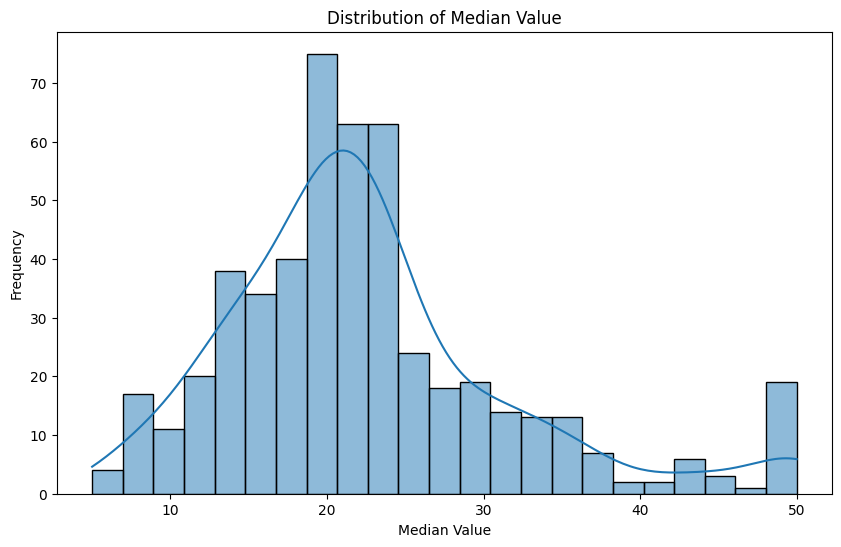

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [40]:
plt.figure(figsize=(10,6))
sns.histplot(x="MEDV",data=df,kde=True)
plt.title("Distribution of Median Value")
plt.xlabel("Median Value")
plt.ylabel("Frequency")
plt.show()
print(df["MEDV"].describe())

- **Hence data was rightskewed try to normalize data**

### Transform data
- it will normalize data we will get better accuracy for better predictions


In [41]:
from scipy.stats.mstats import normaltest

In [42]:
normaltest(df["MEDV"])

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))

In [43]:
log_med=np.log(df["MEDV"])
normaltest(log_med)

NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))

- the p-value is still <0.05 hence the data was not normalized

<Axes: >

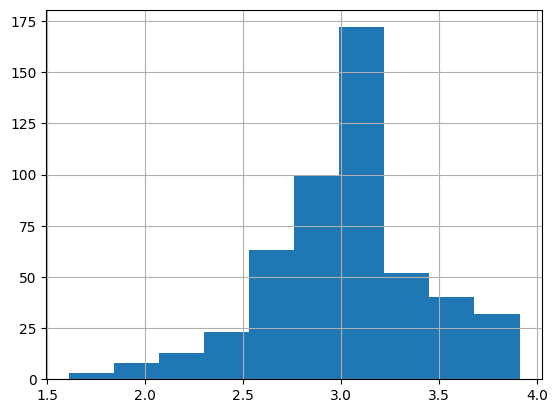

In [44]:
log_med.hist()

In [45]:
sqrt_med=np.sqrt(df["MEDV"])
normaltest(sqrt_med)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

In [46]:
from scipy.stats import boxcox

In [47]:
bc_med,bc_param=boxcox(df["MEDV"])
normaltest(bc_med)

NormaltestResult(statistic=np.float64(4.5135288641281655), pvalue=np.float64(0.10468866464430764))

- better p-value p>=0.05 so the data was normilazed

In [48]:
bc_param

np.float64(0.2166208725297122)

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.9256495 , 2.34873712, 2.77182473, 3.19491235, 3.61799997,
        4.04108759, 4.46417521, 4.88726282, 5.31035044, 5.73343806,
        6.15652568]),
 <BarContainer object of 10 artists>)

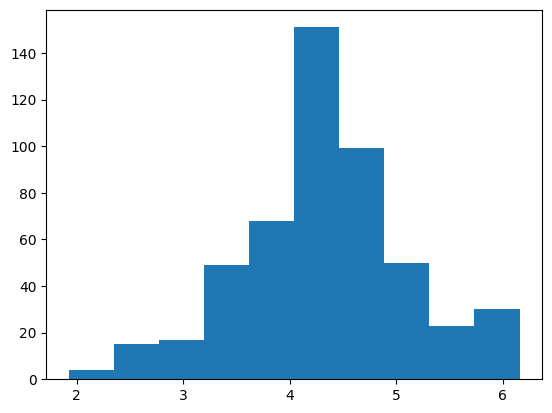

In [49]:
plt.hist(bc_med)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)

In [51]:
lr=LinearRegression()

In [52]:
y=df["MEDV"]
x=df.drop("MEDV", axis=1)

- **Polynimalfeatures for better prediction**

In [54]:
pf = PolynomialFeatures(degree=2, include_bias=False)
x_pf = pf.fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_pf,y,test_size=0.3,random_state=142)

In [56]:
y_train.shape

(354,)

In [57]:
y_train_bc,y_train_param=boxcox(y_train)

In [60]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [61]:
lr.fit(x_train_sc,y_train_bc)
y_pred_bc=lr.predict(x_test_sc)

- we got boxcox we invert that values

In [62]:
from scipy.special import inv_boxcox

In [63]:
y_pred_trans=inv_boxcox(y_pred_bc,y_train_param)
r2_score(y_test,y_pred_trans)

0.7857063394769458

### Lets try normal linear model without transform

In [64]:
md=LinearRegression()
md.fit(x_train,y_train)
y_pred=md.predict(x_test)
r2_score(y_test,y_pred)

0.7426025684218307

- **Hence there we can find difference in accuracy normal,transformed data**